In [1]:
#Make it python 2.x and 3.x compatible
from __future__ import division, print_function

#Import modules
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.dates as md
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas.tools.rplot as rplot

import glob as gb
import os
import sys

import re

import datetime as dt
%matplotlib inline

from IPython.display import HTML


from dateutil.parser import parse

sns.set(style="white", context="talk")

In [2]:
xlxs=pd.ExcelFile("Total electricity consumption.xlsx",skiprows=6)

In [3]:
xlxs.parse?

In [4]:
test1 = xlxs.parse('Sheet1', skiprows=6,na_values='n/a')

In [5]:
test1.head()

,Locations,Active,Id,Lenovo Global Region,Primary Function,Subsidiaries,T&D Loss Rate Category,Type,Ref,Acquisition date,...,Oct to Dec 2014.4,Jan to Mar 2015.4,Apr to Jun 2015.4,Jul to Sep 2015.4,Oct to Dec 2015.4,Jan to Mar 2016.4,Apr to Jun 2016.4,Jul to Sep 2016.4,Oct to Dec 2016.4,Jan to Mar 2017.4
0,Argentina,yes,24619713.0,NaN,NaN,NaN,NaN,Normal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brazil - Campinas (historic),no,25030984.0,Americas Group,Large Office (OFL),Lenovo,NaN,Property,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina - Buenos Aires MM,yes,30726391.0,Americas Group,Small Office (OSL),Motorola Mobility,NaN,Property,ZAR11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,yes,24619618.0,NaN,NaN,NaN,NaN,Normal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada - Toronto,no,24619711.0,Americas Group,Large Office (OFL),Lenovo,NaN,Property,TOR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
list(test1.columns.values)

['Locations',
 'Active',
 'Id',
 'Lenovo Global Region',
 'Primary Function',
 'Subsidiaries',
 'T&D Loss Rate Category',
 'Type',
 'Ref',
 'Acquisition date',
 'Disposal date',
 'Corporate Admin Approver',
 'Data Providers',
 'Initiative administrator',
 'Initiative approver',
 'Initiative user',
 'Invoice owner',
 'Manager Approver',
 'Measure reader',
 'Reviewers ',
 'Site Auditor',
 'Site Data Coordinator (Site manager)',
 'Site Data Coordinators_test',
 'Site Data Reviewer (Data Approver)',
 'Site Data Reviewer_test',
 'Suppliers',
 'eGrid',
 'Country',
 'Reference',
 'Location',
 'Source type',
 'Meter note',
 'CRC meter',
 'Meter indicator',
 'Meter default unit',
 'Meter cost indicator',
 'Meter cost unit',
 'Meter days indicator',
 'Supplier',
 'Contract ref.',
 'Apr to Jun 2012',
 'Jul to Sep 2012',
 'Oct to Dec 2012',
 'Jan to Mar 2013',
 'Apr to Jun 2013',
 'Jul to Sep 2013',
 'Oct to Dec 2013',
 'Jan to Mar 2014',
 'Apr to Jun 2014',
 'Jul to Sep 2014',
 'Oct to Dec 2014',

In [7]:
plot_cols = ['Locations','Lenovo Global Region','Primary Function',
 'Subsidiaries',
 'Apr 2015 to Mar 2016 [kWh]',
'Apr 2015 to Mar 2016 [MT]']

In [8]:
test2=test1.ix[:,plot_cols]

In [9]:
test2

,Locations,Lenovo Global Region,Primary Function,Subsidiaries,Apr 2015 to Mar 2016 [kWh],Apr 2015 to Mar 2016 [MT]
0,Argentina,NaN,NaN,NaN,8.327015e+05,330.332750
1,Brazil - Campinas (historic),Americas Group,Large Office (OFL),Lenovo,NaN,0.000000
2,Argentina - Buenos Aires MM,Americas Group,Small Office (OSL),Motorola Mobility,2.359660e+05,87.543386
3,Australia,NaN,NaN,NaN,3.001254e+05,247.435864
4,Canada - Toronto,Americas Group,Large Office (OFL),Lenovo,NaN,0.000000
5,Australia - Melbourne,Asia Pacific,Small Office (OSL),Lenovo,NaN,0.000000
6,Australia - Melbourne MM,Asia Pacific,Small Office (OSL),Motorola Mobility,NaN,7.935771
7,Australia - St Leonards,Asia Pacific,Small Office (OSL),Medion,NaN,0.000000
8,Austria,NaN,NaN,NaN,6.684700e+04,11.096602
9,Austria - Vienna,EMEA,Small Office (OSL),Lenovo,3.044300e+04,5.053538


In [10]:
test3=test2.dropna(axis=0)

In [11]:
max(test3['Apr 2015 to Mar 2016 [kWh]'])

19410730.775965299

In [13]:
#sort by total kwh.
result1 = test3.sort(['Apr 2015 to Mar 2016 [kWh]'], ascending=False)
result1

C:\Users\ycao_000\Anaconda2\envs\Python3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Locations,Lenovo Global Region,Primary Function,Subsidiaries,Apr 2015 to Mar 2016 [kWh],Apr 2015 to Mar 2016 [MT]
18,"United States - Morrisville, NC - Development ...",Americas Group,Research and Development (RD),Lenovo,1.941073e+07,8468.265559
19,"United States - Chicago MMart, IL",Americas Group,Research and Development (RD),Motorola Mobility,1.341175e+07,9032.999573
25,"United States - Morrisville, NC - Think Place",Americas Group,Research and Development (RD),Lenovo,1.099220e+07,4721.662999
29,Brazil - Jaguariuna MM,Americas Group,Large Office (OFL),Motorola Mobility,9.801463e+06,1748.083295
53,Mexico - Monterrey,Americas Group,Manufacturing (MFG),Lenovo,6.285419e+06,3282.134592
59,Brazil - Itu,Americas Group,Manufacturing (MFG),Lenovo,4.994568e+06,696.887159
65,Japan - NEC Yonezawa,Asia Pacific,Manufacturing (MFG),NEC,4.085360e+06,2511.466527
74,"United States - Sunnyvale, CA",Americas Group,Research and Development (RD),Motorola Mobility,3.821050e+06,1257.032882
76,"United States - Plantation, FL",Americas Group,Research and Development (RD),Motorola Mobility,3.100050e+06,1588.762839
77,Japan - NEC Gunma,Asia Pacific,Manufacturing (MFG),NEC,2.987556e+06,1828.275628


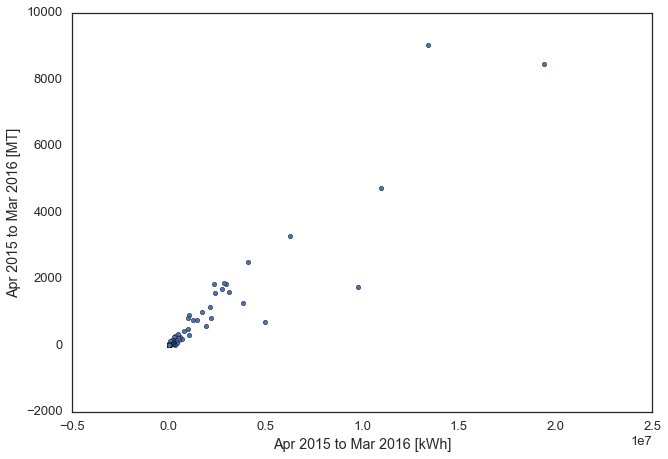

In [14]:
#simplest way to plot.
result1.plot(kind='scatter', x='Apr 2015 to Mar 2016 [kWh]', y='Apr 2015 to Mar 2016 [MT]')

# First way to plot, area proportional to the MT/kWh

In [15]:
#define a function to use different color for different regions. 
def colorpoint(row):
    if row['Lenovo Global Region'] == 'Asia Pacific':
        return('g')
    if row['Lenovo Global Region'] == 'EMEA':
        return('r')
    else:
        return('b')
  
    
#mean_mff_SrEUI = df_clean['Source EUI'].mean()
#mean_mff_SiEUI = df_clean['Site EUI'].mean()
    
#test2['yellow'] = ((df_clean['Source EUI'] > mean_mff_SrEUI*1.2) & (df_clean['Site EUI'] < df_clean['Source EUI']*0.5))
test3['color'] = test3.apply (lambda row: colorpoint (row),axis=1)

C:\Users\ycao_000\Anaconda2\envs\Python3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
#Round the decimals of kWh and MT to 1 decimal. 
decimals = pd.Series([1, 1], index=['Apr 2015 to Mar 2016 [kWh]', 'Apr 2015 to Mar 2016 [MT]'])
test4 = test3.round(decimals)
test4

,Locations,Lenovo Global Region,Primary Function,Subsidiaries,Apr 2015 to Mar 2016 [kWh],Apr 2015 to Mar 2016 [MT],color,MT/kWh
2,Argentina - Buenos Aires MM,Americas Group,Small Office (OSL),Motorola Mobility,235966.0,87.5,b,0.000371
9,Austria - Vienna,EMEA,Small Office (OSL),Lenovo,30443.0,5.1,r,0.000166
10,Austria - Wels,EMEA,Small Office (OSL),Medion,36404.0,6.0,r,0.000166
18,"United States - Morrisville, NC - Development ...",Americas Group,Research and Development (RD),Lenovo,19410730.8,8468.3,b,0.000436
19,"United States - Chicago MMart, IL",Americas Group,Research and Development (RD),Motorola Mobility,13411754.1,9033.0,b,0.000674
20,Brazil - Sao Paulo MM,Americas Group,Small Office (OSL),Motorola Mobility,256903.8,34.4,b,0.000134
22,Bulgaria - Sofia,EMEA,Small Office (OSL),Lenovo,46548.8,23.6,r,0.000507
25,"United States - Morrisville, NC - Think Place",Americas Group,Research and Development (RD),Lenovo,10992200.9,4721.7,b,0.000430
28,Canada - Ottawa,Americas Group,Small Office (OSL),x86,34180.0,5.4,b,0.000158
29,Brazil - Jaguariuna MM,Americas Group,Large Office (OFL),Motorola Mobility,9801463.4,1748.1,b,0.000178


In [32]:
#define the x and y value of the scatter plot. 
y=test4['Apr 2015 to Mar 2016 [MT]']
x=test4['Apr 2015 to Mar 2016 [kWh]']
#Give a name of the color column of the plot. 
T = test4['color']
#define the area of the dot based on "emission intensity".
area= (y/x)*500000
#set the limit of the y and x axis, just slightly bigger than the maximum value.
xmax=1.1*max(test4['Apr 2015 to Mar 2016 [kWh]'])
ymax=1.1*max(test4['Apr 2015 to Mar 2016 [MT]'])

In [33]:
np.average(y/x)

0.00049107556689847673

In [34]:
max(y/x)

0.0017117585791270639

# Find those problematic sites:

In [35]:
#Find those problematic sites by sorting MT/kWh
test4['MT/kWh']=test4['Apr 2015 to Mar 2016 [MT]']/test4['Apr 2015 to Mar 2016 [kWh]']
result2 = test4.sort('MT/kWh', ascending=False)

C:\Users\ycao_000\Anaconda2\envs\Python3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


## the top 10 most problematic sites

In [36]:
result2.head(10)

,Locations,Lenovo Global Region,Primary Function,Subsidiaries,Apr 2015 to Mar 2016 [kWh],Apr 2015 to Mar 2016 [MT],color,MT/kWh
263,United Kingdom - Hook,EMEA,Large Office (OFL),Lenovo,75617.3,129.4,r,0.001711
202,South Africa - Johannesburg/Bryanston,EMEA,Small Office (OSL),Lenovo,101374.6,93.9,r,0.000926
232,India - Chennai Factory,Asia Pacific,Manufacturing (MFG),Motorola Mobility,316360.0,271.9,g,0.000859
159,India - Pondicherry,Asia Pacific,Manufacturing (MFG),Lenovo,1074016.0,907.9,g,0.000845
242,Australia - Chatswood,Asia Pacific,Large Office (OFL),Lenovo,300125.4,239.5,g,0.000798
162,India - Bangalore Ferns,Asia Pacific,Research and Development (RD),Lenovo,1016173.0,805.7,g,0.000793
85,India - Mumbai,Asia Pacific,Small Office (OSL),Lenovo,59656.0,47.2,g,0.000791
82,India - Gurgaon MM,Asia Pacific,Small Office (OSL),Motorola Mobility,195929.2,155.0,g,0.000791
122,India - Bangalore,Asia Pacific,Large Office (OFL),Motorola Mobility,2327140.7,1840.8,g,0.000791
79,India - Chennai,Asia Pacific,Small Office (OSL),Lenovo,9230.0,7.3,g,0.000791


In [37]:
#Summary by global region and Subsidiaries. 
result2.groupby(['Lenovo Global Region','Subsidiaries']).sum()

Apr 2015 to Mar 2016 [kWh]  \
Lenovo Global Region Subsidiaries                                    
Americas Group       CCE                                  447582.4   
                     EMC                                   41227.2   
                     Lenovo                             45907905.3   
                     Motorola Mobility                  35215388.7   
                     x86                                 3178765.7   
Asia Pacific         Lenovo                              6876949.7   
                     Motorola Mobility                   2844389.9   
                     NEC                                 7370896.8   
                     x86                                 2782972.0   
EMEA                 EMC                                   38923.0   
                     Lenovo                              6665856.6   
                     Medion                              3077531.5   
                     Motorola Mobility                    710655.3   
                     x86                                 1015279.4   

                                        Apr 2015 to Mar 2016 [MT]    MT/kWh  
Lenovo Global Region Subsidiaries                                            
Americas Group       CCE                                     71.8  0.000160  
                     EMC                                     12.0  0.000291  
                     Lenovo                               18960.9  0.004990  
                     Motorola Mobility                    16481.3  0.003762  
                     x86                                   1110.0  0.003025  
Asia Pacific         Lenovo                                4559.7  0.013733  
                     Motorola Mobility                     2270.5  0.003006  
                     NEC                                   4510.2  0.014375  
                     x86                                   1703.2  0.000612  
EMEA                 EMC                                      0.9  0.000023  
                     Lenovo                                2838.5  0.014812  
                     Medion                                1861.1  0.003067  
                     Motorola Mobility                      389.3  0.001228  
                     x86                                    498.5  0.001228

In [38]:
#find the worst 10 performer by global region.
EMEA=test4[test4['Lenovo Global Region'] =='EMEA']
Americas_Group=test4[test4['Lenovo Global Region'] =='Americas Group']
Asia_Pacific=test4[test4['Lenovo Global Region'] =='Asia Pacific']

EMEA.sort('MT/kWh', ascending=False).head(10)
Americas_Group.sort('MT/kWh', ascending=False).head(10)
Asia_Pacific.sort('MT/kWh', ascending=False).head(10)

C:\Users\ycao_000\Anaconda2\envs\Python3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\ycao_000\Anaconda2\envs\Python3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\ycao_000\Anaconda2\envs\Python3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Locations,Lenovo Global Region,Primary Function,Subsidiaries,Apr 2015 to Mar 2016 [kWh],Apr 2015 to Mar 2016 [MT],color,MT/kWh
232,India - Chennai Factory,Asia Pacific,Manufacturing (MFG),Motorola Mobility,316360.0,271.9,g,0.000859
159,India - Pondicherry,Asia Pacific,Manufacturing (MFG),Lenovo,1074016.0,907.9,g,0.000845
242,Australia - Chatswood,Asia Pacific,Large Office (OFL),Lenovo,300125.4,239.5,g,0.000798
162,India - Bangalore Ferns,Asia Pacific,Research and Development (RD),Lenovo,1016173.0,805.7,g,0.000793
85,India - Mumbai,Asia Pacific,Small Office (OSL),Lenovo,59656.0,47.2,g,0.000791
82,India - Gurgaon MM,Asia Pacific,Small Office (OSL),Motorola Mobility,195929.2,155.0,g,0.000791
122,India - Bangalore,Asia Pacific,Large Office (OFL),Motorola Mobility,2327140.7,1840.8,g,0.000791
79,India - Chennai,Asia Pacific,Small Office (OSL),Lenovo,9230.0,7.3,g,0.000791
81,India - Gurgaon,Asia Pacific,Small Office (OSL),Lenovo,48985.0,38.7,g,0.000790
91,Indonesia - Jakarta,Asia Pacific,Small Office (OSL),Lenovo,42476.0,32.3,g,0.000760


In [39]:
#Mark the location of the most problematic point on the graph. 
#test4['MT/kWh'].idxmax(axis=0)
location=(test4.ix[test4['MT/kWh'].idxmax(axis=0),'Apr 2015 to Mar 2016 [kWh]'],test4.ix[test4['MT/kWh'].idxmax(axis=0),'Apr 2015 to Mar 2016 [MT]'])
#location

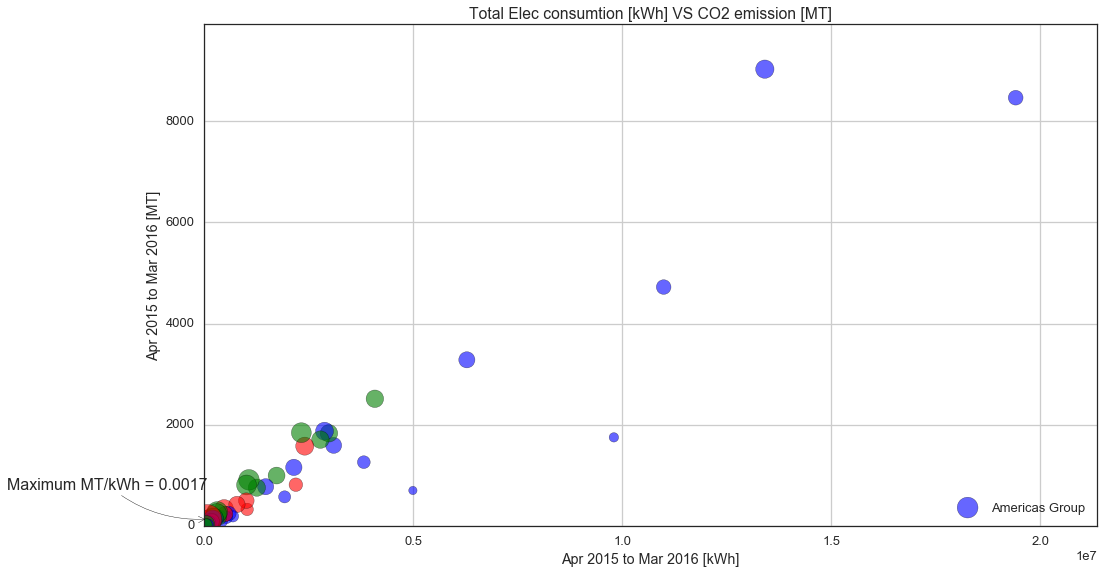

In [41]:
#RED= Asia Pacific, Green= EMEA, Blue= Americas Group.
fig1 = plt.figure(figsize=(16,9), dpi=300)
ax = plt.subplot(111)

plot=plt.scatter(x,y,alpha=0.6,c=T,s=area)

#plot.set_label(test4['Lenovo Global Region'].unique())
#ax.legend()

#plot = rplot.RPlot(test4, x='Apr 2015 to Mar 2016 [kWh]', y='Apr 2015 to Mar 2016 [MT]')

ax.grid(True)
ax.set_xlim([0,xmax])
ax.set_ylim([0,ymax])
ax.set_xlabel('Apr 2015 to Mar 2016 [kWh]')

#ax.xaxis.set_label_coords(1,0.45)
ax.set_ylabel('Apr 2015 to Mar 2016 [MT]')

#ax.yaxis.set_label_coords(0.4,1)
ax.set_title('Total Elec consumtion [kWh] VS CO2 emission [MT]')

x1 = np.arange(0,xmax+10,1)
y1 = np.max(y/x)*x1
y2 = np.average(y/x)*x1 


#mark the maximum MT/kWh point
plt.annotate('Maximum MT/kWh = 0.0017',
             xy=location,  xycoords='data',
             xytext=(-200, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

#plt.annotate('Average MT/kWh = 0.0017',
            # xy=(125,125),  xycoords='data',
             #xytext=(+100, -80), textcoords='offset points', fontsize=16,
             #arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


#add trend line
#plot.add(rplot.GeomPolyFit(degree=1))

#ax.fill_between(x1, y1, y2,where=y2 <= y1, facecolor='red', interpolate=False,alpha=0.2)

#Try to add legend ?????????????????????????????????????
legend=test4['Lenovo Global Region']
plt.legend(legend.values,loc=4)


#legend((line1, line2, line3), ('label1', 'label2', 'label3'))

In [43]:
legend.values

array(['Americas Group', 'EMEA', 'EMEA', 'Americas Group',
       'Americas Group', 'Americas Group', 'EMEA', 'Americas Group',
       'Americas Group', 'Americas Group', 'Americas Group',
       'Americas Group', 'EMEA', 'EMEA', 'EMEA', 'EMEA', 'EMEA', 'EMEA',
       'EMEA', 'Americas Group', 'EMEA', 'Americas Group', 'EMEA',
       'Asia Pacific', 'EMEA', 'Americas Group', 'Americas Group',
       'Asia Pacific', 'Asia Pacific', 'Americas Group', 'Asia Pacific',
       'Asia Pacific', 'Asia Pacific', 'Asia Pacific', 'Asia Pacific',
       'EMEA', 'EMEA', 'EMEA', 'Asia Pacific', 'Asia Pacific',
       'Asia Pacific', 'Asia Pacific', 'Asia Pacific', 'Asia Pacific',
       'Asia Pacific', 'Asia Pacific', 'Asia Pacific', 'Asia Pacific',
       'Asia Pacific', 'Asia Pacific', 'Asia Pacific', 'Asia Pacific',
       'EMEA', 'Asia Pacific', 'Asia Pacific', 'Asia Pacific', 'EMEA',
       'Asia Pacific', 'Asia Pacific', 'Asia Pacific', 'Asia Pacific',
       'Asia Pacific', 'Asia Pacific', 'As

# Second way to plot with regression line. 

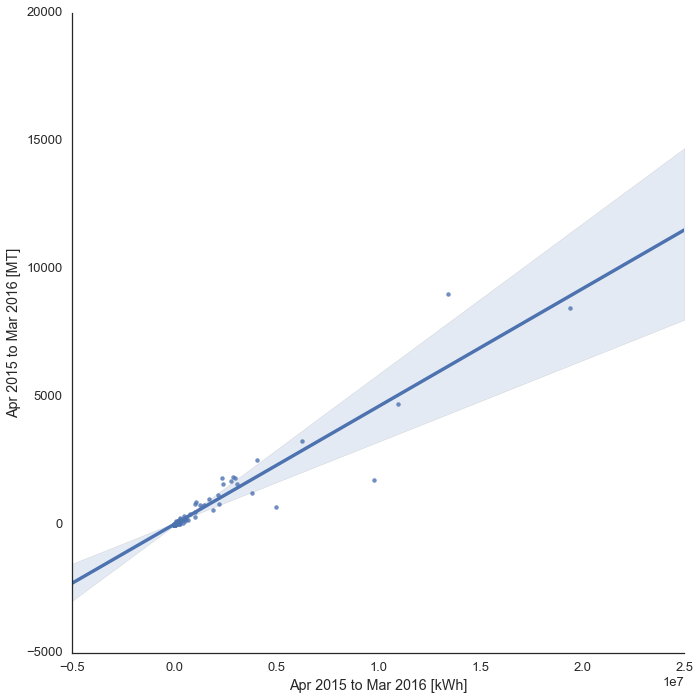

In [44]:
sns.lmplot(x="Apr 2015 to Mar 2016 [kWh]", y="Apr 2015 to Mar 2016 [MT]", data=test4,size=10, aspect=1)

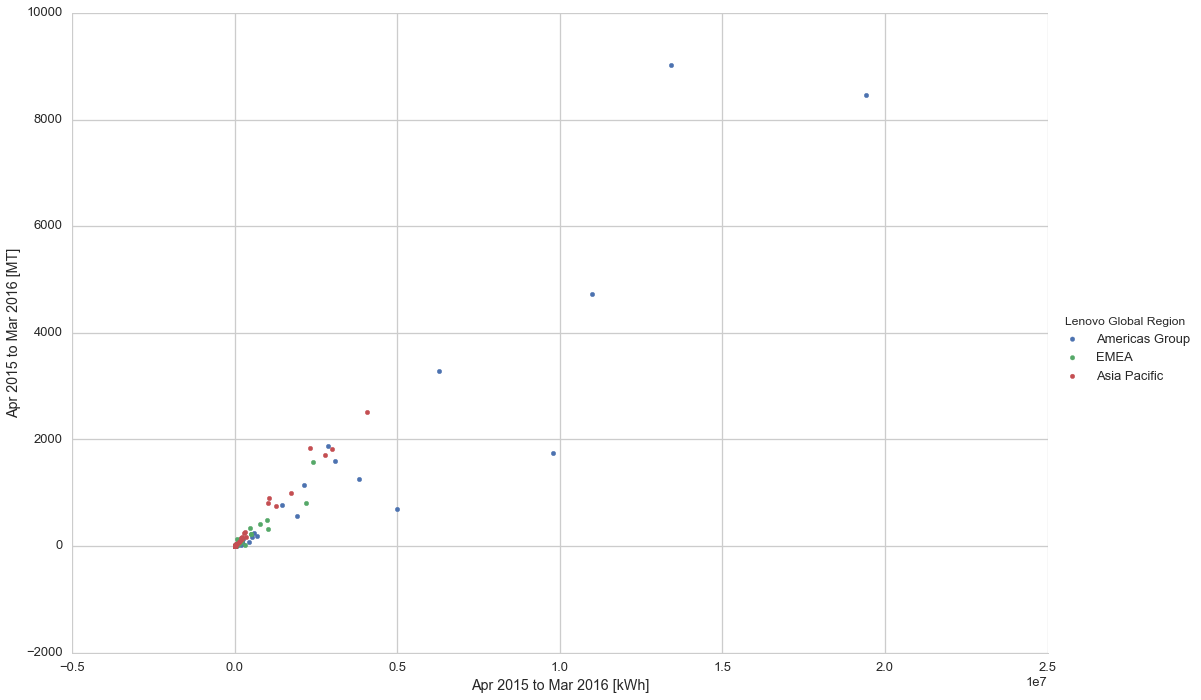

In [45]:
#use seaborn to plot. 
sns.set_style("whitegrid")
g = sns.FacetGrid(test4, hue="Lenovo Global Region",size=10, aspect=1.5)
g=(g.map(plt.scatter, "Apr 2015 to Mar 2016 [kWh]", "Apr 2015 to Mar 2016 [MT]").add_legend())


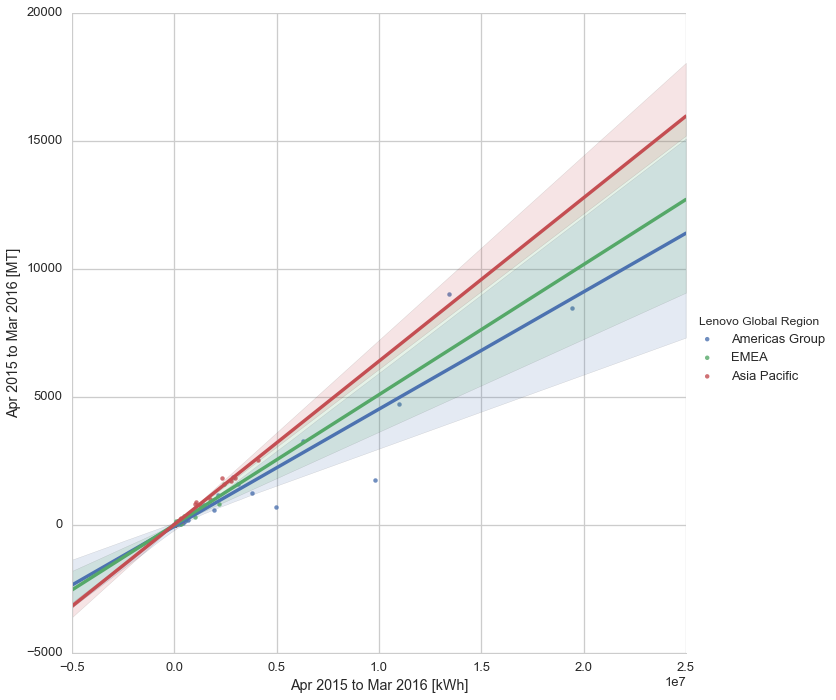

In [46]:
#g = sns.FacetGrid(test4, margin_titles=True,hue="Lenovo Global Region",size=10, aspect=1)
#g.map(sns.regplot, "Apr 2015 to Mar 2016 [kWh]", "Apr 2015 to Mar 2016 [MT]", order=1)

sns.lmplot(x="Apr 2015 to Mar 2016 [kWh]", y="Apr 2015 to Mar 2016 [MT]", data=test4, hue="Lenovo Global Region",size=10, aspect=1)

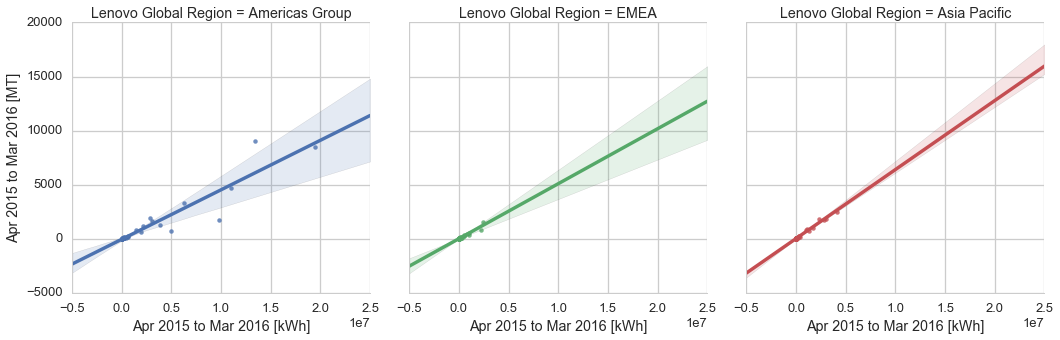

In [47]:
#Plot by global region.
sns.set_style("whitegrid")
g = sns.FacetGrid(test4, col="Lenovo Global Region", hue="Lenovo Global Region",margin_titles=True,size=5, aspect=1)
g.map(sns.regplot, "Apr 2015 to Mar 2016 [kWh]", "Apr 2015 to Mar 2016 [MT]", order=1)
